In [1]:
# Generate an imbalanced dataset with 100 nodes
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

X, y = make_classification(n_classes = 2, class_sep = 2,
                           weights = [0.9, 0.1], n_informative = 2,
                           n_redundant = 0, flip_y = 0,
                           n_features = 2, n_clusters_per_class = 1,
                           n_samples = 100, random_state =1)
print(Counter(y))

Counter({0: 90, 1: 10})


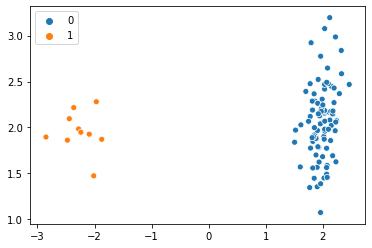

In [2]:
plt.figure()
sns.scatterplot(X[:,0], X[:,1], hue = y)
plt.show()

In [3]:
# Synthesized Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

# Let numbers of 0 and 1 are same by increasing number of 1 as same as that of 0
smo = SMOTE(random_state = 42)
X_smo, y_smo = smo.fit_sample(X, y)
print(Counter(y_smo))

Counter({0: 90, 1: 90})


# Use SMOTE for various types of data volumes

Suppose the class and quantity of raw data:<br>
Class=0, n=70 (32.710%)<br>
Class=1, n=76 (35.514%)<br>
Class=2, n=17 (7.944%)<br>
Class=3, n=13 (6.075%)<br>
Class=4, n=9 (4.206%)<br>
Class=5, n=29 (13.551%)<br>

There are six categories, of which the first category (Class 1) has the largest number of 76 entries. Use the following method to set how many pieces of data each category has after SMOTE.<br>

strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}<br>
oversample = SMOTE(sampling_strategy=strategy)<br>
X, y = oversample.fit_resample(X, y)<br>


result<br>
Class=0, n=100 (10.000%)<br>
Class=1, n=100 (10.000%)<br>
Class=2, n=200 (20.000%)<br>
Class=3, n=200 (20.000%)<br>
Class=4, n=200 (20.000%)<br>
Class=5, n=200 (20.000%)<br>

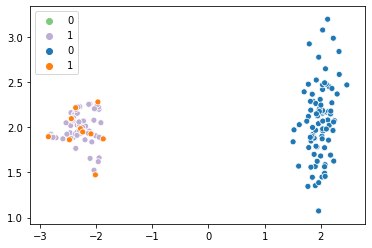

In [4]:
plt.figure()
sns.scatterplot(X_smo[:,0],X_smo[:,1], hue = y_smo, palette = 'Accent')
sns.scatterplot(X[:,0],X[:,1],hue = y)
plt.show()

In [5]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier()
clf.fit(X_smo,y_smo)
y_pred = clf.predict(X_smo)
conf_matrix = confusion_matrix(y_smo, y_pred)
conf_matrix

array([[90,  0],
       [ 0, 90]], dtype=int64)

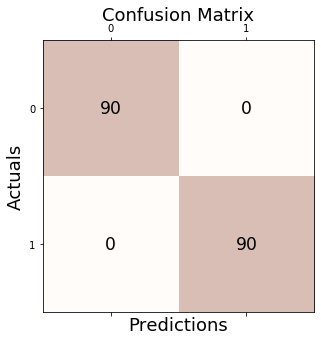

In [6]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [7]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_smo, y_pred)

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([90, 90], dtype=int64))

In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report # combination of above
print(classification_report(y_smo, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        90

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# K-fold

In [9]:
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
y_pred = clf.predict(X)
print("clf.score = ", clf.score(X, y))
print("AC = ", accuracy_score(y_pred, y))

fold5 = cross_val_score(clf, X, y, cv=5)
print(fold5)

fold10 = cross_val_score(clf, X, y, cv=10)
print(fold10)

clf.score =  1.0
AC =  1.0
[0.96666667 0.96666667 0.9        0.93333333 1.        ]
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier(max_depth = 3) # set max depth
clf.fit(X,y)
y_pred = clf.predict(X)
print("clf.score = ", clf.score(X, y))
print("AC = ", accuracy_score(y_pred, y))

fold5 = cross_val_score(clf, X, y, cv=5)
print(fold5)

fold10 = cross_val_score(clf, X, y, cv=10)
print(fold10)

clf.score =  0.9733333333333334
AC =  0.9733333333333334
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
[1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.        ]
